In [1]:
import pandas as pd

import plotnine
from plotnine import *

dpi=300

In [2]:
df=pd.read_csv('../data/Fig4D.csv', index_col=0)
df

,Background,Celltype,value,cell_state_dendrogram_index,Percentage_roi_thresMean,Celltype_abb
0,PRES,EC.Arterial,-0.430425,28,0.333333,EC.Arterial
1,EDAD,EC.Arterial,1.262580,28,0.564815,EC.Arterial
2,MDAD,EC.Arterial,-1.077283,28,0.250000,EC.Arterial
3,ODAD,EC.Arterial,0.245129,28,0.519231,EC.Arterial
4,PRES,Mesothelial,0.695855,29,0.571429,Mesothelial
...,...,...,...,...,...,...
123,ODAD,B.Plasma.IgG,1.268080,15,0.711538,B.Plasma.IgG
124,PRES,EC.Venous.Systemic,-0.786323,3,0.523810,EC.Venous.Sys
125,EDAD,EC.Venous.Systemic,-0.661160,3,0.453704,EC.Venous.Sys
126,MDAD,EC.Venous.Systemic,0.054055,3,0.625000,EC.Venous.Sys


In [3]:
manual_cell_order=[
    'EC.Arterial',
    'Mesothelial',
    'FB.Basal',
    'Monocyte',
    None,
    'Macro.Alv.Meta.CCL',
    'FB.Alveolar',
    'Macro.HSP',
    None,
    'Proliferating.T.NK',
    'Pericytes',
    'EC.Capillary',
    'EP.AT1',
    None,
    'Macro.CHIT1.like',
    'Macro.Alv',
    'T.CD4+',
    'T.CD8+',
    'B.Plasma.IgA',
    'FB.Myofibroblast',
    'EP.AT2',
    'FB.Adventitial',
    'B.Plasma.IgG',
    'EC.Venous.Sys'
]

order_of_pathology=['PRES', 'EDAD', 'MDAD', 'ODAD'][::-1]

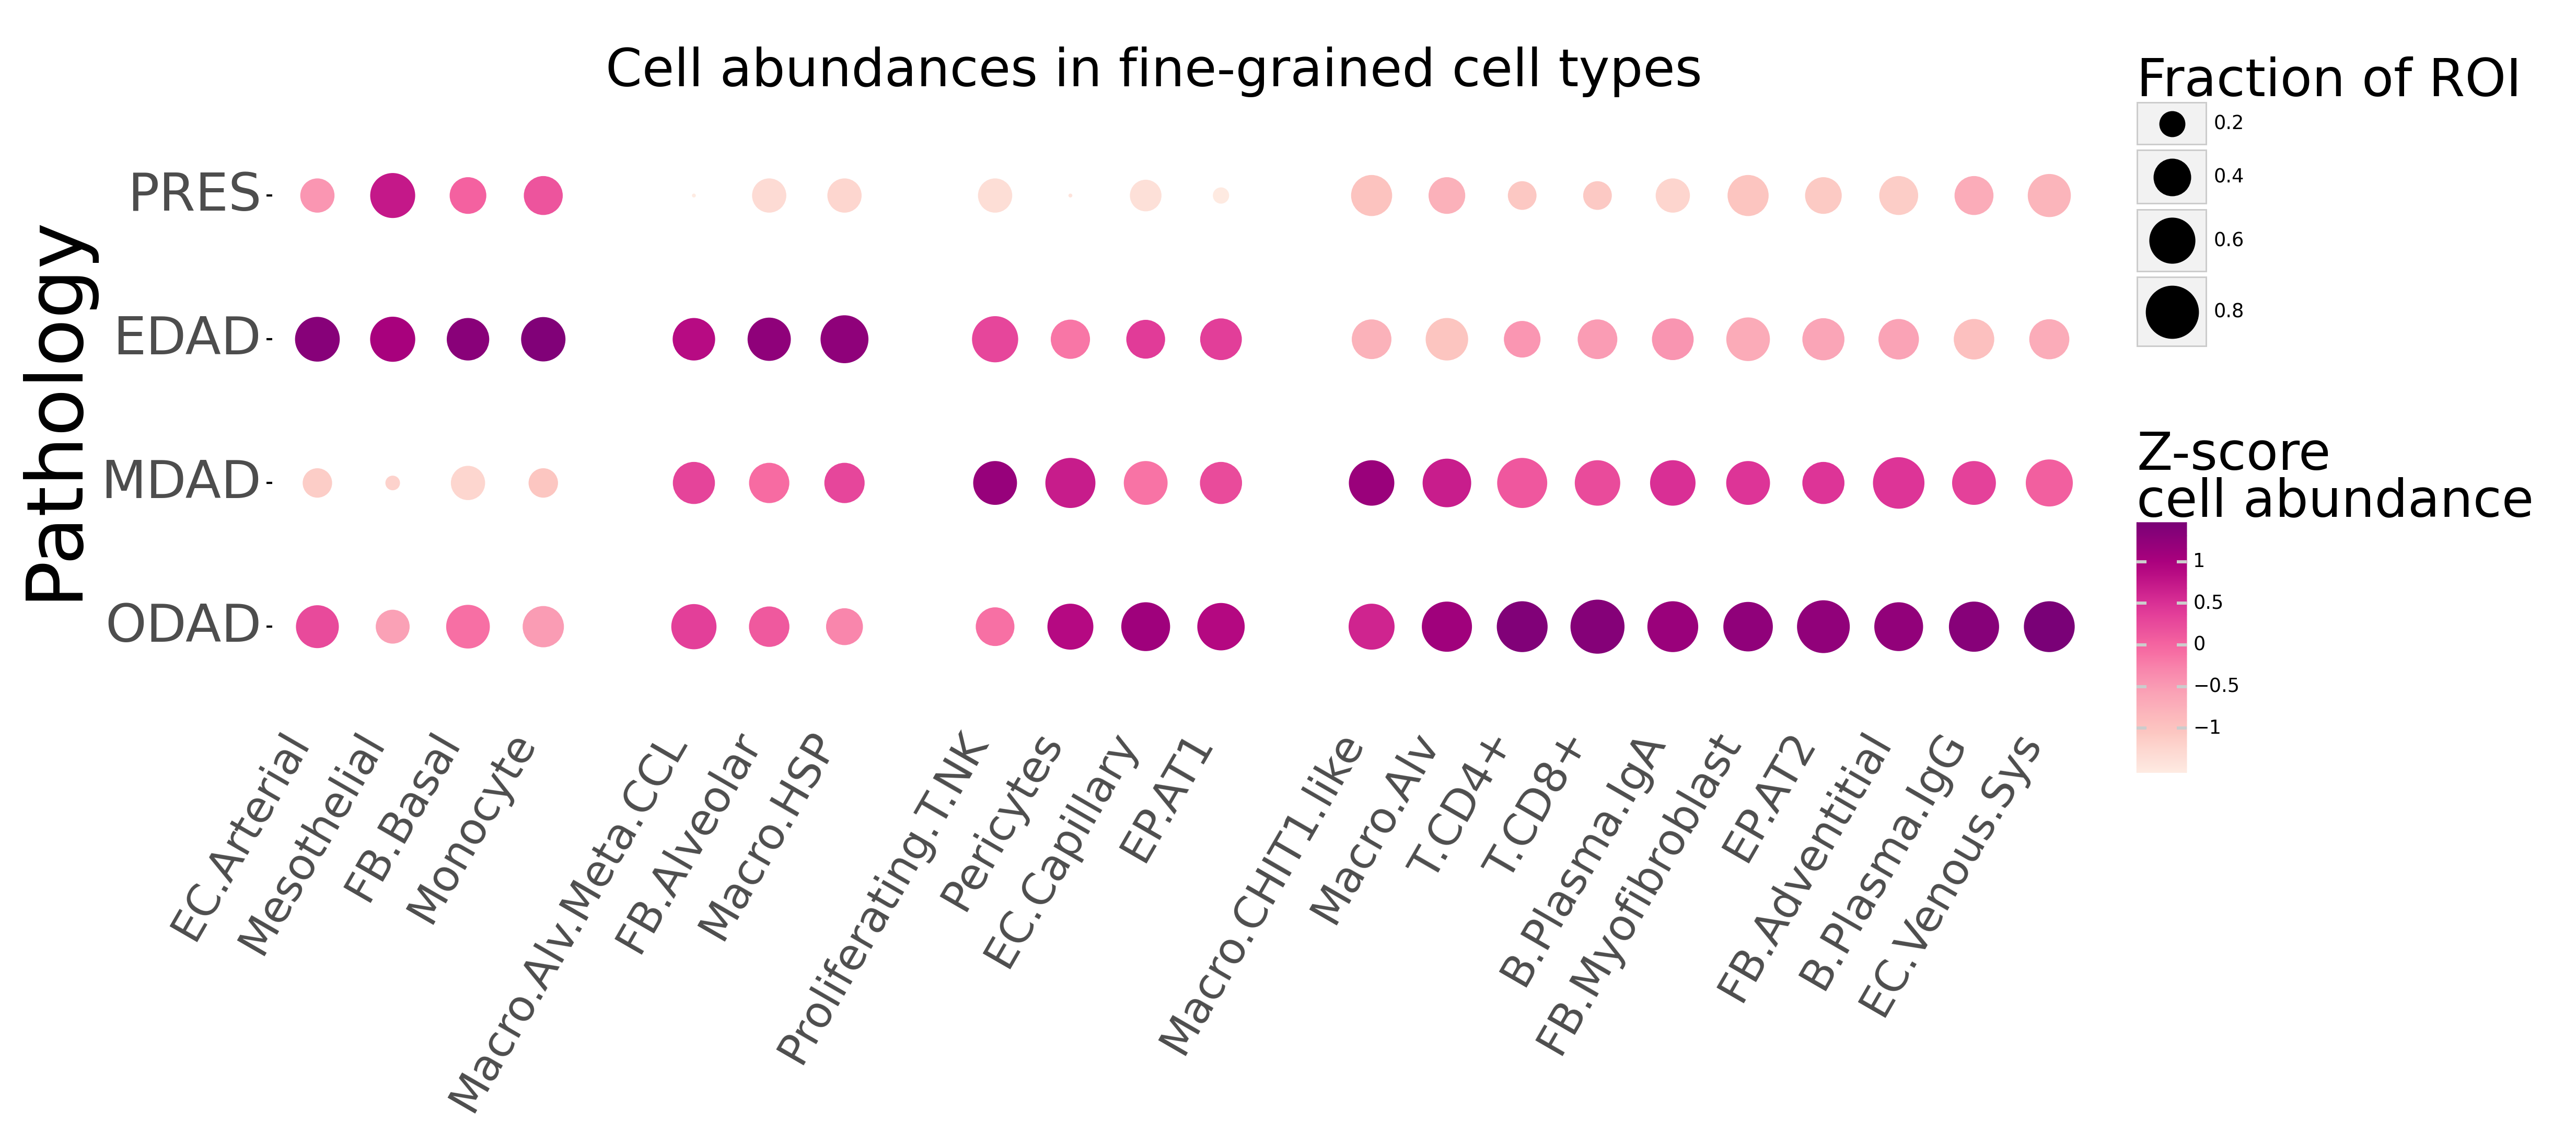

<ggplot: (8779912522737)>

In [4]:
p1=(
    ggplot()
    + geom_point(
        data=df, 
        mapping=aes(
            x='Celltype_abb', 
            y='Background', 
            fill='value', 
            colour='value',
            size='Percentage_roi_thresMean'
        )
    )
    + theme_bw()
    + theme(
        axis_text_x=element_text(angle=60, vjust=1, hjust=1, size=20), 
        axis_text_y=element_text(size=24),
        axis_title=element_text(size=36), 
        axis_ticks_major_x=element_blank(),
        title=element_text(size=24),
        panel_grid_major=element_blank(),
        panel_border=element_blank(),
        panel_spacing_x=.5,
        panel_spacing_y=.2,
        figure_size=(15,5), 
        dpi=dpi,
        legend_position='right' 
    ) 
    + scale_size_continuous(range=[0,13]) 
    + scale_fill_distiller(palette='RdPu', direction=1) 
    + scale_colour_distiller(palette='RdPu', direction=1) 
    + scale_x_discrete(limits=manual_cell_order ) 
    + scale_y_discrete(limits=order_of_pathology) 
    + labs(
        x='', 
        y='Pathology', 
        title='Cell abundances in fine-grained cell types',
        size='Fraction of ROI', 
        fill='Z-score\ncell abundance\n', 
        colour='Z-score\ncell abundance\n'
    )
)

# ggsave(p1, 'Fig4D.pdf', format='pdf')

p1